In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') #Michael's from Rotten Tomatos 
movie_studios = pd.read_csv('zippedData/bom.movie_gross.csv.gz')     #Teigen's from Box Office Mojo 
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')    #Louis' from basics IMDB
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')  #Louis' ratings from IMDB
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')                  #Ely's from TMDB

In [4]:
#Ely's innitial cleaning TMDB 
genres={'28':"Action",
'12':"Adventure",
'16':"Animation",
'35':"Comedy",
'80':"Crime",
'99':"Documentary",
'18':"Drama",
'10751':"Family",
'14':"Fantasy",
'36':"History",
'27':"Horror",
'10402':"Music",
'9648':"Mystery",
'10749':"Romance",
'878':"Science Fiction",
'10770':"TV Movie",
'53':"Thriller",
'10752':"War",
'37':"Western"}

tmdb = tmdb.replace(pd.Series(genres).astype(str), regex=True)
tmdb['genre_ids']=tmdb['genre_ids'].str.strip('[]').str.split(', ')


In [5]:
#IMDB merge
title_master = title_basics.merge(title_ratings, how='inner')

In [6]:
louis_and_ely = tmdb.merge(title_master, how = 'inner')
louis_and_ely

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,tt0814255,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy",5.9,165108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17800,26509,[Horror],502255,en,Closing Time,0.600,20Drama-02-24,Closing Time,0.0,1,tt8731118,Closing Time,2018,116.0,Documentary,6.4,51
17801,26514,"[Fantasy, Action, Adventure]",381231,en,The Last One,0.600,20Drama-10-01,The Last One,0.0,1,tt2962488,The Last One,2014,80.0,"Documentary,History,News",7.0,26
17802,26514,"[Fantasy, Action, Adventure]",381231,en,The Last One,0.600,20Drama-10-01,The Last One,0.0,1,tt3118968,The Last One,2018,85.0,"Action,Adventure,Fantasy",6.1,15
17803,26515,"[Family, Adventure, Action]",366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,tt3377456,Trailer Made,2016,79.0,Adventure,4.3,25


In [7]:
louis_and_ely_and_teigen = louis_and_ely.merge(movie_studios, how = 'inner')


In [8]:
let = louis_and_ely_and_teigen.drop(['domestic_gross', 'foreign_gross'], axis = 1)
let

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,year
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299,P/DW,2010
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,BV,2010
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511,Uni.,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,24778,[Drama],484428,sv,Unga Astrid,4.734,20Drama-11-23,Becoming Astrid,7.4,28,tt6433456,Becoming Astrid,2018,123.0,"Biography,Drama",7.2,2497,MBox,2018
2832,24916,[Drama],473262,it,"Nico, 1988",3.789,20Drama-07-04,"Nico, 1988",7.3,40,tt7186092,"Nico, 1988",2017,93.0,"Biography,Drama,Music",6.8,1007,Magn.,2018
2833,25037,[Documentary],465871,en,Maria by Callas,3.184,20Drama-11-02,Maria by Callas,7.6,11,tt7364566,Maria by Callas,2017,119.0,"Biography,Documentary,Music",7.2,867,SPC,2018
2834,25148,"[Action, Adventure, Animation]",332718,en,Bilal: A New Breed of Hero,2.707,20Drama-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,VE,2018


In [9]:
let = louis_and_ely_and_teigen.drop(['domestic_gross', 'foreign_gross'], axis = 1)
let

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,year
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299,P/DW,2010
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,BV,2010
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511,Uni.,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,24778,[Drama],484428,sv,Unga Astrid,4.734,20Drama-11-23,Becoming Astrid,7.4,28,tt6433456,Becoming Astrid,2018,123.0,"Biography,Drama",7.2,2497,MBox,2018
2832,24916,[Drama],473262,it,"Nico, 1988",3.789,20Drama-07-04,"Nico, 1988",7.3,40,tt7186092,"Nico, 1988",2017,93.0,"Biography,Drama,Music",6.8,1007,Magn.,2018
2833,25037,[Documentary],465871,en,Maria by Callas,3.184,20Drama-11-02,Maria by Callas,7.6,11,tt7364566,Maria by Callas,2017,119.0,"Biography,Documentary,Music",7.2,867,SPC,2018
2834,25148,"[Action, Adventure, Animation]",332718,en,Bilal: A New Breed of Hero,2.707,20Drama-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,VE,2018


In [10]:
movie_budgets_df = movie_budgets_df.rename(columns={'movie':'title'})

In [11]:
master_unclean = let.merge(movie_budgets_df, on = 'title', how = 'inner')
master_unclean

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,genres,averagerating,numvotes,studio,year,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Action,Adventure,Animation",8.1,611299,P/DW,2010,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,...,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,"Adventure,Animation,Comedy",8.3,682218,BV,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,"Animation,Comedy,Family",7.7,464511,Uni.,2010,50,"Jul 9, 2010","$69,000,000","$251,513,985","$543,464,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,24089,"[Drama, History, Thriller]",453201,en,The 15:17 to Paris,11.576,20Drama-02-09,The 15:17 to Paris,5.3,799,...,"Biography,Drama,Thriller",5.2,21880,WB,2018,23,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,24120,[Comedy],474335,en,Uncle Drew,10.836,20Drama-06-29,Uncle Drew,6.5,220,...,"Comedy,Sport",5.7,9739,LG/S,2018,85,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,24168,"[Crime, Drama, History, Thriller]",339103,en,Gotti,10.034,20Drama-06-15,Gotti,5.2,231,...,"Biography,Crime,Drama",4.8,10358,VE,2018,64,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,24212,"[Thriller, Action, Crime]",442064,en,Proud Mary,9.371,20Drama-01-Adventure,Proud Mary,5.5,259,...,"Action,Crime,Drama",4.9,6805,SGem,2018,50,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [12]:
master_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1664
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1665 non-null   int64  
 1   genre_ids          1665 non-null   object 
 2   id_x               1665 non-null   int64  
 3   original_language  1665 non-null   object 
 4   original_title     1665 non-null   object 
 5   popularity         1665 non-null   float64
 6   release_date_x     1665 non-null   object 
 7   title              1665 non-null   object 
 8   vote_average       1665 non-null   float64
 9   vote_count         1665 non-null   int64  
 10  tconst             1665 non-null   object 
 11  primary_title      1665 non-null   object 
 12  start_year         1665 non-null   int64  
 13  runtime_minutes    1631 non-null   float64
 14  genres             1659 non-null   object 
 15  averagerating      1665 non-null   float64
 16  numvotes           1665 

In [13]:
master_unclean['vote_count'].describe()

count     1665.000000
mean      2162.216216
std       2876.171747
min          1.000000
25%        353.000000
50%       1098.000000
75%       2715.000000
max      22186.000000
Name: vote_count, dtype: float64

In [14]:
run_time = master_unclean.loc[(master_unclean['runtime_minutes'] > 30) & (master_unclean['runtime_minutes'] < 180)]
run_time

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,genres,averagerating,numvotes,studio,year,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Action,Adventure,Animation",8.1,611299,P/DW,2010,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,...,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,"Adventure,Animation,Comedy",8.3,682218,BV,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,"Animation,Comedy,Family",7.7,464511,Uni.,2010,50,"Jul 9, 2010","$69,000,000","$251,513,985","$543,464,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,24089,"[Drama, History, Thriller]",453201,en,The 15:17 to Paris,11.576,20Drama-02-09,The 15:17 to Paris,5.3,799,...,"Biography,Drama,Thriller",5.2,21880,WB,2018,23,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,24120,[Comedy],474335,en,Uncle Drew,10.836,20Drama-06-29,Uncle Drew,6.5,220,...,"Comedy,Sport",5.7,9739,LG/S,2018,85,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,24168,"[Crime, Drama, History, Thriller]",339103,en,Gotti,10.034,20Drama-06-15,Gotti,5.2,231,...,"Biography,Crime,Drama",4.8,10358,VE,2018,64,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,24212,"[Thriller, Action, Crime]",442064,en,Proud Mary,9.371,20Drama-01-Adventure,Proud Mary,5.5,259,...,"Action,Crime,Drama",4.9,6805,SGem,2018,50,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [15]:
less_columns = master_unclean.drop(['Unnamed: 0', 'id_x', 'original_title', 'tconst', 'start_year', 'id_y', 'genres', 'release_date_x', 'primary_title'], axis = 1)

In [16]:
less_columns

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,year,release_date_y,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",en,28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,P/DW,2010,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,"[Adventure, Action, Science Fiction]",en,28.515,Iron Man 2,6.8,12368,124.0,7.0,657690,Par.,2010,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,"[Action, Science Fiction, Adventure]",en,27.920,Inception,8.3,22186,148.0,8.8,1841066,WB,2010,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,"[Animation, Family, Comedy]",en,24.445,Toy Story 3,7.7,8340,103.0,8.3,682218,BV,2010,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
4,"[Animation, Family, Comedy]",en,23.673,Despicable Me,7.2,10057,95.0,7.7,464511,Uni.,2010,"Jul 9, 2010","$69,000,000","$251,513,985","$543,464,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,"[Drama, History, Thriller]",en,11.576,The 15:17 to Paris,5.3,799,94.0,5.2,21880,WB,2018,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,[Comedy],en,10.836,Uncle Drew,6.5,220,103.0,5.7,9739,LG/S,2018,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,"[Crime, Drama, History, Thriller]",en,10.034,Gotti,5.2,231,112.0,4.8,10358,VE,2018,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,"[Thriller, Action, Crime]",en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,2018,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [17]:
less_columns=less_columns.loc[less_columns['year'] >= 2016]

In [18]:
less_columns=less_columns.drop(['year'], axis=1)

In [19]:
less_columns

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross
195,"[Comedy, Animation]",en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017","$5,000,000","$176,040,665","$255,367,951"
196,"[Mystery, Thriller, Horror]",en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017","$5,000,000","$176,040,665","$255,367,951"
435,"[Action, Animation]",en,2.058,Black Panther,5.1,11,134.0,7.3,516148,BV,"Feb 16, 2018","$200,000,000","$700,059,566","$1,348,258,224"
436,"[Action, Adventure, Fantasy, Science Fiction]",en,44.140,Black Panther,7.4,12365,134.0,7.3,516148,BV,"Feb 16, 2018","$200,000,000","$700,059,566","$1,348,258,224"
438,[Comedy],en,0.725,Snatched,3.5,2,81.0,5.5,61,Fox,"May 12, 2017","$42,000,000","$45,852,178","$57,852,177"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,"[Drama, History, Thriller]",en,11.576,The 15:17 to Paris,5.3,799,94.0,5.2,21880,WB,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,[Comedy],en,10.836,Uncle Drew,6.5,220,103.0,5.7,9739,LG/S,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,"[Crime, Drama, History, Thriller]",en,10.034,Gotti,5.2,231,112.0,4.8,10358,VE,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,"[Thriller, Action, Crime]",en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [20]:
#clean up budget and gross numbers, add the return on investment column
less_columns['production_budget'] = less_columns['production_budget'].str.replace(',', '')
less_columns['production_budget'] = less_columns['production_budget'].str.replace('$', '')
less_columns['production_budget'] = less_columns['production_budget'].astype(int)
less_columns['domestic_gross'] = less_columns['domestic_gross'].str.replace(',', '').str.replace('$', '')
less_columns['domestic_gross'] = less_columns['domestic_gross'].astype(int)
less_columns['worldwide_gross'] = less_columns['worldwide_gross'].str.replace(',', '').str.replace('$', '')
less_columns['worldwide_gross'] = less_columns['worldwide_gross'].astype(int)
less_columns['total_gross'] = less_columns['domestic_gross'] + less_columns['worldwide_gross']
less_columns['ROI'] = (less_columns['total_gross'] / less_columns['production_budget']) * 100

In [21]:
#studio grouping and analysis begins here

studios = less_columns.groupby(['studio'], sort = True).max()
studios

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
studio,,,,,,,,,,,,,,,
A24,"[Horror, Mystery, Thriller]",en,26.185,The Florida Project,7.4,3866,163.0,7.6,177677,"Sep 30, 2016",10000000,48958273,78610769,127569042,4364.580000
Affirm,[History],en,12.005,"Paul, Apostle of Christ",7.1,98,108.0,6.7,5662,"Mar 23, 2018",5000000,17547999,25529498,43077497,861.549940
Amazon,"[Horror, Fantasy]",en,16.925,Suspiria,7.0,752,152.0,6.8,37360,"Oct 26, 2018",20000000,2483472,7034615,9518087,47.590435
Annapurna,"[Thriller, Science Fiction, Action, Adventure]",en,20.125,Vice,7.2,1213,132.0,7.2,72855,"Dec 25, 2018",60000000,47836282,70883171,118719453,289.791167
BBC,"[Music, Documentary]",fr,0.600,They Will Have to Kill Us First,5.0,1,100.0,7.3,112,"Mar 4, 2016",600000,0,7943,7943,1.323833
BG,"[Thriller, Horror, Mystery]",en,11.787,Wish Upon,6.6,2005,127.0,7.0,72359,"Jun 24, 2016",47500000,15436808,23477345,37778850,314.823750
BH Tilt,"[Horror, Thriller]",en,21.413,Upgrade,7.4,1326,100.0,8.8,104978,"May 13, 2016",5000000,11977130,16553285,28530415,2530.133300
BST,"[Horror, Thriller]",en,16.316,Unsane,7.1,1627,141.0,7.4,105966,"Sep 30, 2016",30000000,27778642,44264271,72042913,1462.331667
BV,"[Fantasy, Family, Comedy]",en,80.773,Zootopia,8.3,14000,149.0,8.5,670926,"Sep 23, 2016",300000000,700059566,2048134200,2726949682,1024.158895


In [22]:
studios.sort_values(by='ROI', ascending=False)

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
studio,,,,,,,,,,,,,,,
Uni.,"[Thriller, Horror]",en,40.095,Welcome to Marwen,8.3,10375,141.0,8.3,400474,"Sep 29, 2017",250000000,417719760,1305772799,1723492559,8628.172320
A24,"[Horror, Mystery, Thriller]",en,26.185,The Florida Project,7.4,3866,163.0,7.6,177677,"Sep 30, 2016",10000000,48958273,78610769,127569042,4364.580000
WB (NL),"[Thriller, Mystery, Horror]",en,21.245,The House,7.7,10931,135.0,8.6,359123,"Sep 8, 2017",50000000,327481748,697457969,1024939717,4321.506900
Par.,"[War, Comedy]",en,43.078,Zoolander 2,10.0,10387,154.0,7.9,515483,"Oct 21, 2016",217000000,188024361,602893340,733062023,3607.388420
LG/S,"[Drama, Music]",en,25.805,Uncle Drew,7.9,10028,139.0,8.0,436070,"Sep 30, 2016",156000000,151101803,426351163,577452966,2887.264830
BH Tilt,"[Horror, Thriller]",en,21.413,Upgrade,7.4,1326,100.0,8.8,104978,"May 13, 2016",5000000,11977130,16553285,28530415,2530.133300
LGF,"[Thriller, Horror]",en,24.074,Wonder,10.0,6608,139.0,8.6,366904,"Sep 28, 2018",63000000,132422809,304604712,437027521,2185.137605
Fox,"[Thriller, Horror]",en,39.293,X-Men: Apocalypse,8.2,20175,144.0,8.0,820847,"Sep 22, 2017",178000000,363070709,894985342,1164096302,2020.524875
FoxS,"[Drama, History, Comedy]",en,28.651,"Three Billboards Outside Ebbing, Missouri",8.2,7224,126.0,8.2,344047,"Sep 22, 2017",25000000,63859435,195790794,259650229,1789.213792


In [23]:
S = less_columns.loc[less_columns['studio'] == 'Strand']
S

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI


In [24]:
universal = less_columns.loc[less_columns['studio'] == 'Uni.']
universal

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
195,"[Comedy, Animation]",en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
196,"[Mystery, Thriller, Horror]",en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
580,"[Horror, Thriller, Mystery]",en,8.102,Truth or Dare,5.6,194,96.0,5.6,8123,Uni.,"Apr 13, 2018",3500000,41411015,95127344,136538359,3901.095971
581,"[Horror, Thriller, Mystery]",en,8.102,Truth or Dare,5.6,194,85.0,6.0,14,Uni.,"Apr 13, 2018",3500000,41411015,95127344,136538359,3901.095971
582,"[Horror, Thriller, Mystery]",en,8.102,Truth or Dare,5.6,194,84.0,4.8,554,Uni.,"Apr 13, 2018",3500000,41411015,95127344,136538359,3901.095971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,"[History, Drama]",en,22.958,First Man,7.1,2304,92.0,6.6,186,Uni.,"Oct 12, 2018",60000000,44936545,105203825,150140370,250.233950
1619,"[Drama, Romance]",en,22.512,Fifty Shades Freed,6.1,3535,105.0,4.5,43893,Uni.,"Feb 9, 2018",55000000,100407760,371350619,471758379,857.742507
1620,"[Drama, Comedy, Fantasy]",en,22.032,Welcome to Marwen,6.6,286,116.0,6.1,8920,Uni.,"Dec 21, 2018",45000000,10763520,12874922,23638442,52.529871
1621,[Comedy],en,21.841,Blockers,6.1,969,102.0,6.2,57142,Uni.,"Apr 6, 2018",21000000,60311495,94045328,154356823,735.032490


In [25]:
A24 = less_columns.loc[less_columns['studio'] == 'A24']
A24

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
1180,"[Horror, Crime, Thriller]",en,9.943,Green Room,6.8,1314,95.0,7.0,90773,A24,"Apr 15, 2016",5000000,3220371,3807503,7027874,140.557480
1181,"[Horror, Crime, Thriller]",en,9.943,Green Room,6.8,1314,95.0,7.0,90773,A24,"Apr 15, 2016",5000000,3220371,3807503,7027874,140.557480
1379,"[Comedy, Drama, Romance, Fantasy, Adventure]",en,10.000,Swiss Army Man,6.9,1789,97.0,7.0,91736,A24,"Jun 24, 2016",3000000,4210454,5837111,10047565,334.918833
1406,[Drama],en,8.778,American Honey,6.7,417,163.0,7.0,31663,A24,"Sep 30, 2016",3500000,663247,2611750,3274997,93.571343
1488,"[Comedy, Drama]",en,15.974,Lady Bird,7.3,3866,94.0,7.4,177677,A24,"Nov 3, 2017",10000000,48958273,78610769,127569042,1275.690420
1489,"[Comedy, Drama]",en,15.974,Lady Bird,7.3,3866,94.0,7.4,177677,A24,"Nov 3, 2017",10000000,48958273,78610769,127569042,1275.690420
1519,"[Comedy, Drama]",en,13.270,The Disaster Artist,7.2,1895,104.0,7.4,111737,A24,"Dec 1, 2017",10000000,21120616,28717667,49838283,498.382830
1520,"[Comedy, Drama]",en,13.270,The Disaster Artist,7.2,1895,104.0,7.4,111737,A24,"Dec 1, 2017",10000000,21120616,28717667,49838283,498.382830
1528,"[Action, Crime, Mystery]",en,12.116,Free Fire,6.3,540,91.0,6.4,35954,A24,"Apr 21, 2017",10000000,1799322,3793739,5593061,55.930610
1532,"[Drama, Fantasy, Romance]",en,11.886,A Ghost Story,7.0,906,92.0,6.8,46280,A24,"Jul 7, 2017",100000,1594798,2769782,4364580,4364.580000


In [26]:
Tri = less_columns.loc[less_columns['studio'] == 'TriS']
Tri

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
1357,"[Thriller, Drama]",en,11.134,Money Monster,6.4,1859,98.0,6.5,86607,TriS,"May 13, 2016",27000000,41012075,93466095,134478170,498.067296
1372,[Drama],en,10.078,Miracles from Heaven,7.1,478,109.0,7.1,17734,TriS,"Mar 16, 2016",13000000,61705123,73798736,135503859,1042.337377
1458,"[Action, Crime]",en,22.895,Baby Driver,7.4,8034,113.0,7.6,363977,TriS,"Jun 28, 2017",34000000,107825862,228104185,335930047,988.029550


In [27]:
paramount = less_columns.loc[less_columns['studio'] == 'Par.']
paramount

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
1250,[Comedy],en,0.600,Book Club,10.0,1,72.0,6.6,9,Par.,"May 18, 2018",10000000,68566296,91113683,159679979,1596.799790
1251,[Comedy],en,0.600,Book Club,10.0,1,104.0,6.1,18728,Par.,"May 18, 2018",10000000,68566296,91113683,159679979,1596.799790
1252,"[Comedy, Romance, Drama]",en,11.514,Book Club,6.0,301,72.0,6.6,9,Par.,"May 18, 2018",10000000,68566296,91113683,159679979,1596.799790
1253,"[Comedy, Romance, Drama]",en,11.514,Book Club,6.0,301,104.0,6.1,18728,Par.,"May 18, 2018",10000000,68566296,91113683,159679979,1596.799790
1264,"[Drama, Science Fiction, Mystery]",en,25.442,Arrival,7.4,10387,116.0,7.9,515483,Par.,"Nov 11, 2016",47000000,100546139,203127894,303674033,646.114964
1265,"[Drama, Science Fiction, Mystery]",en,25.442,Arrival,7.4,10387,116.0,7.9,515483,Par.,"Nov 11, 2016",47000000,100546139,203127894,303674033,646.114964
1270,"[Action, Drama, War, Romance, Thriller]",en,19.611,Allied,6.7,2765,124.0,7.1,125741,Par.,"Nov 23, 2016",106000000,40098064,119266661,159364725,150.344080
1271,"[Action, Drama, War, Romance, Thriller]",en,19.611,Allied,6.7,2765,124.0,7.1,125741,Par.,"Nov 23, 2016",106000000,40098064,119266661,159364725,150.344080
1272,"[Action, Adventure, Science Fiction]",en,19.142,Star Trek Beyond,6.7,4275,122.0,7.1,209844,Par.,"Jul 22, 2016",185000000,158848340,335802233,494650573,267.378688
1277,"[Thriller, Science Fiction, Drama]",en,17.892,10 Cloverfield Lane,6.9,4629,103.0,7.2,260383,Par.,"Mar 11, 2016",5000000,72082999,108286422,180369421,3607.388420


In [28]:
exploded = less_columns.explode('genre_ids', ignore_index=False)

In [29]:
exploded.reset_index()

,index,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
0,195,Comedy,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
1,195,Animation,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
2,196,Mystery,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
3,196,Thriller,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
4,196,Horror,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1663,Action,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257
1295,1663,Crime,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257
1296,1664,Action,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573
1297,1664,Adventure,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573


In [30]:
exploded['release_date_y'].values[0][0:3]

'Feb'

In [80]:
exploded['month'] = exploded['release_date_y'].str[0:3]

In [81]:
exploded

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI,month
195,Comedy,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
195,Animation,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
196,Mystery,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
196,Thriller,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
196,Horror,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Action,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257,Jan
1663,Crime,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257,Jan
1664,Action,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573,Feb
1664,Adventure,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573,Feb


In [82]:
month = exploded['month']

In [83]:
month.value_counts().index

Index(['Nov', 'Dec', 'Jun', 'Jan', 'Jul', 'Sep', 'Apr', 'Oct', 'Feb', 'Aug',
       'Mar', 'May'],
      dtype='object')

In [84]:
exploded['genre_ids'].value_counts

<bound method IndexOpsMixin.value_counts of 195        Comedy
195     Animation
196       Mystery
196      Thriller
196        Horror
          ...    
1663       Action
1663        Crime
1664       Action
1664    Adventure
1664    Animation
Name: genre_ids, Length: 1299, dtype: object>

In [ ]:
month_genre_roi_title = exploded.drop(['original_language'], ['popularity'], ['vote_adverage'], ['vote_count'],\
                                      ['runtime_minutes'], ['averagerating'], ['numvotes'] axis=1)

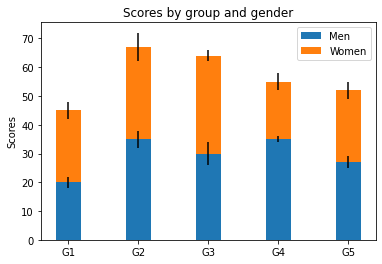

In [76]:


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()